# Multiple Regression Analysis on Video Game Movie Reviews and Sales Data

Aaron Hum - MAT 421 - Final Project

## Introduction

This project tests the "so-bad-it's-good" effect, where people actively seek out "bad" movies in order to watch them for comedic or satirical purposes. In order to test this, I have found a dataset of 42 video game movies, including their titles, release date, worldwide box office earnings (in US dollars), Rotten Tomatoes score (percentage), Metacritic score (out of 100), film distributor, and publisher.

Data source: https://www.kaggle.com/bcruise/film-adaptations-of-video-games

## Models and Numerical Methods

### Models Used

Linear Regression, Multiple Linear Regression

### Numerical Methods

The equation will measure Y, the box office sales of a movie in US dollars, in the equation: 

Y = box office sales of a movie in US dollars

X1 = Metacritic score, X2 = Rotten Tomato score

B0 = Intercept, Bn = Slope of the regression line for each variable, e = error

Y = B0 + B1X1 + B2X2 + e

## Expectations

I expect Metacritic scores and Rotten Tomatoes scores will have a negative correlation to box office sales, due to my hypothesised “so-bad-it’s-good” effect.

I expect the model will have a lot of error, due to the wide variance among video game movie box office sales and scores, and also, due to the relatively small sample size (42), there could be a lot of error as well.

## Python Libraries in this Project

numpy: Numerical computations

pandas: Data manipulation

matplotlib: Data visualization

seaborn: Statistical data visualization

sklearn: Regression, machine learning, data analysis

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading the Dataset

Upload 'video_game_films.csv' from the data source.

In [ ]:
# upload 'video_game_films.csv' 
from google.colab import files
uploaded = files.upload()

Saving video_game_films.csv to video_game_films.csv


In [ ]:
dataset = pd.read_csv("video_game_films.csv")
dataset

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,38912465.0,24.0,35.0,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,1994-11-04,4152699.0,13.0,NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,1994-12-23,99423521.0,13.0,34.0,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,124741822.0,44.0,60.0,New Line Cinema,Midway
4,Mortal Kombat: Annihilation,1997-11-21,51376861.0,2.0,11.0,New Line Cinema,Midway
5,Wing Commander,1999-03-12,11578059.0,10.0,21.0,20th Century Fox,Origin Systems
6,Lara Croft: Tomb Raider,2001-06-15,274703340.0,20.0,33.0,Paramount Pictures,Eidos
7,Resident Evil,2002-03-15,102984862.0,36.0,33.0,Sony Pictures Releasing,Capcom
8,Lara Croft: Tomb Raider – The Cradle of Life,2003-07-25,156505388.0,24.0,43.0,Paramount Pictures,Eidos
9,House of the Dead,2003-10-10,13818181.0,3.0,15.0,Artisan Entertainment,Sega Sammy


### Removing Null Values from the Dataset

In [ ]:
# Examining the dataset
dataset.shape
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    42 non-null     object 
 1   Release date             42 non-null     object 
 2   Worldwide box office     42 non-null     float64
 3   Rotten Tomatoes          40 non-null     float64
 4   Metacritic               38 non-null     float64
 5   Distributor              42 non-null     object 
 6   Original game publisher  42 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.4+ KB


,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,38912465.0,24.0,35.0,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,1994-11-04,4152699.0,13.0,NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,1994-12-23,99423521.0,13.0,34.0,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,124741822.0,44.0,60.0,New Line Cinema,Midway
4,Mortal Kombat: Annihilation,1997-11-21,51376861.0,2.0,11.0,New Line Cinema,Midway


In [ ]:
# Finding out how many null values there are
dataset.isnull()

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

Title                      0
Release date               0
Worldwide box office       0
Rotten Tomatoes            2
Metacritic                 4
Distributor                0
Original game publisher    0
dtype: int64

In [ ]:
# Drop the null values of the dataset
dataset = dataset.dropna()
dataset

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,38912465.0,24.0,35.0,Buena Vista Pictures Distribution,Nintendo
2,Street Fighter,1994-12-23,99423521.0,13.0,34.0,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,124741822.0,44.0,60.0,New Line Cinema,Midway
4,Mortal Kombat: Annihilation,1997-11-21,51376861.0,2.0,11.0,New Line Cinema,Midway
5,Wing Commander,1999-03-12,11578059.0,10.0,21.0,20th Century Fox,Origin Systems
6,Lara Croft: Tomb Raider,2001-06-15,274703340.0,20.0,33.0,Paramount Pictures,Eidos
7,Resident Evil,2002-03-15,102984862.0,36.0,33.0,Sony Pictures Releasing,Capcom
8,Lara Croft: Tomb Raider – The Cradle of Life,2003-07-25,156505388.0,24.0,43.0,Paramount Pictures,Eidos
9,House of the Dead,2003-10-10,13818181.0,3.0,15.0,Artisan Entertainment,Sega Sammy
10,Resident Evil: Apocalypse,2004-09-10,129342769.0,19.0,35.0,Sony Pictures Releasing,Capcom


## Basic Plots, Data Visualization and Analysis

Using matplotlib and seaborn, I create several plots showing different aspects of the data.

### Boxplots

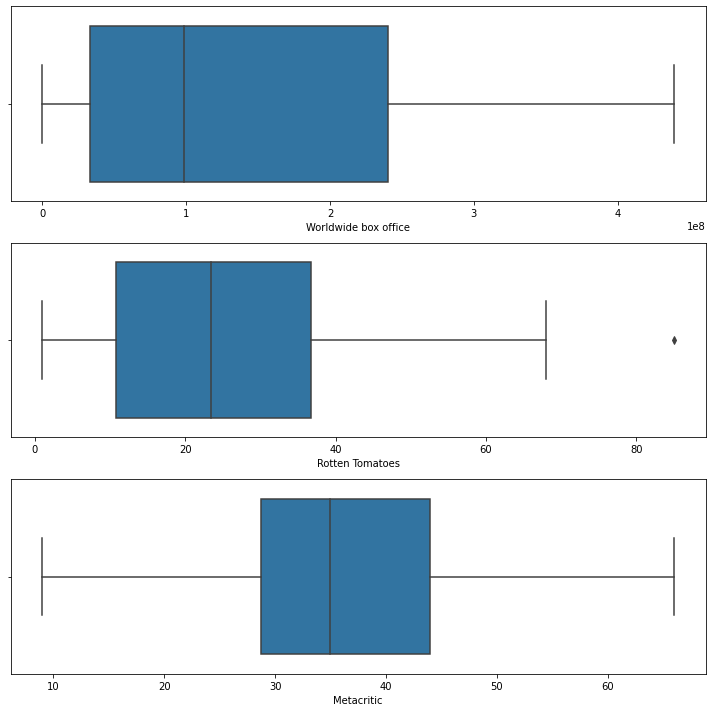

In [ ]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.boxplot(x = dataset['Worldwide box office'], ax = axs[0])
plt2 = sns.boxplot(x = dataset['Rotten Tomatoes'], ax = axs[1])
plt3 = sns.boxplot(x = dataset['Metacritic'], ax = axs[2])
plt.tight_layout()

Boxplot Conclusions: There are no extreme values except for one in Rotten Tomatoes. The Worldwide box office sales and Rotten Tomatoes scores are positive skewed in distribution, Metacritic is realtively unskewed or normal.

### Histogram Plots

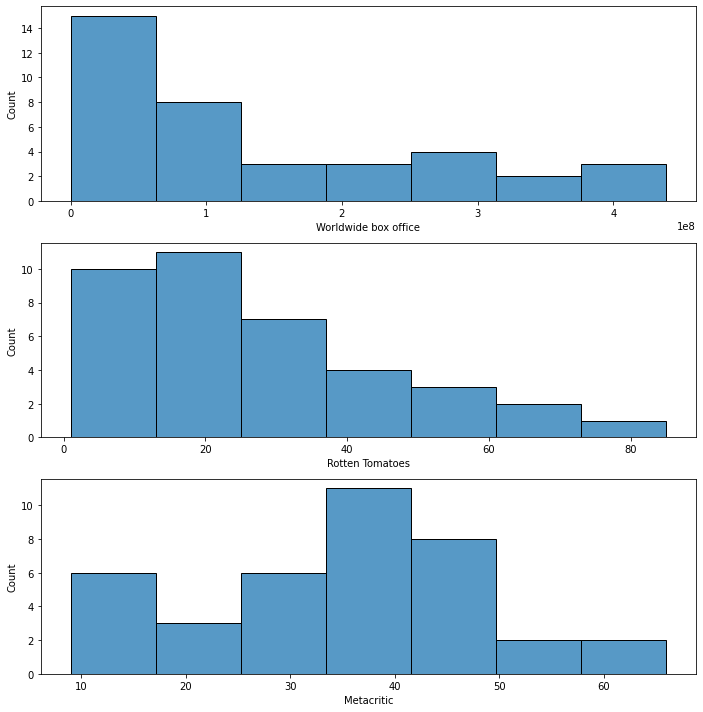

In [ ]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.histplot(x = dataset['Worldwide box office'], ax = axs[0])
plt2 = sns.histplot(x = dataset['Rotten Tomatoes'], ax = axs[1])
plt3 = sns.histplot(x = dataset['Metacritic'], ax = axs[2])
plt.tight_layout()

Histogram Conclusions: Similar conclusions to the boxplots. The Worldwide box office sales and Rotten Tomatoes scores are positive skewed in distribution, Metacritic is realtively unskewed or normal.

### Scatter Plots

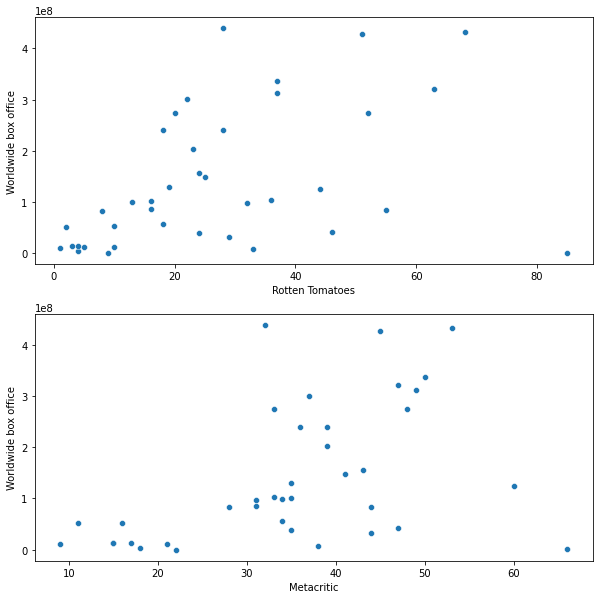

In [ ]:
fig, axs = plt.subplots(2, figsize = (10,10))
plt1 = sns.scatterplot(x = dataset['Rotten Tomatoes'], y = dataset['Worldwide box office'], ax = axs[0])
plt2 = sns.scatterplot(x = dataset['Metacritic'], y = dataset['Worldwide box office'], ax = axs[1])
plt.show()

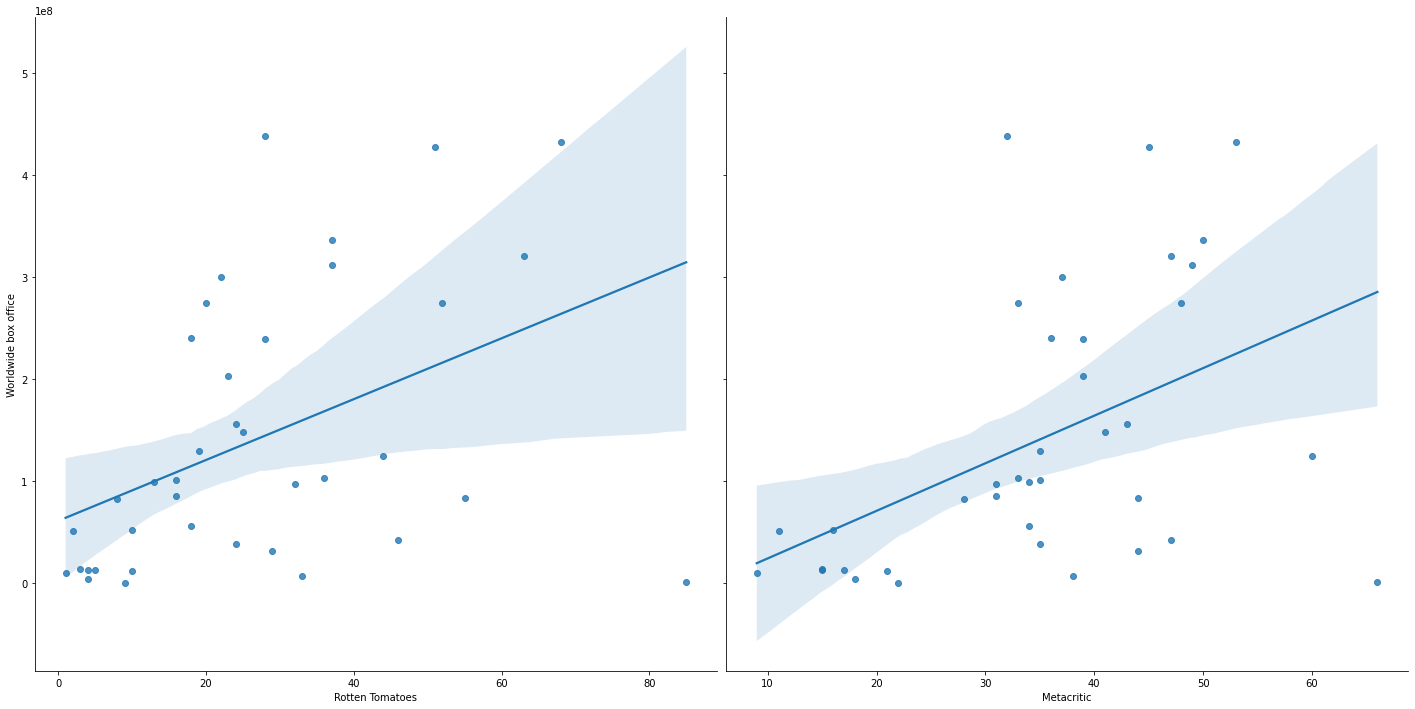

In [ ]:
sns.pairplot(dataset, x_vars=['Rotten Tomatoes', 'Metacritic'], y_vars='Worldwide box office', height=10, aspect=1, kind='reg')
plt.show()

Scatterplot Conclusions: The data, both Metacritic and Rotten Tomatoes scores, seems to be very loosely positively correlated to Worldwide box office.

### Heatmap

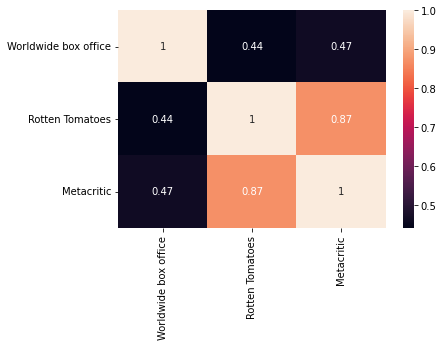

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

Heatmap Conclusions: The heatmap shows that both Rotten Tomatoes and Metacritic are very loosley positively correlated. 

## Modeling

Using sklearn, I do linear regression and multiple regression modelling on the data.

### Linear Regression

#### Imports for Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Creating the Linear Regression Models

In [ ]:
# Simple linear regression on the individual variables
x_rt = dataset[['Rotten Tomatoes']]
x_m = dataset[['Metacritic']]
y = dataset['Worldwide box office']

In [ ]:
x_train_rt, x_test_rt, y_train_rt, y_test_rt = train_test_split(x_rt, y, test_size = 0.3, random_state = 99)
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_m, y, test_size = 0.3, random_state = 99)

reg_m = LinearRegression()
reg_m.fit(x_train_m, y_train_m)
int_m = reg_m.intercept_
coef_m = reg_m.coef_

reg_rt = LinearRegression()
reg_rt.fit(x_train_rt, y_train_rt)
int_rt = reg_rt.intercept_
coef_rt = reg_rt.coef_

In [ ]:
eq_rt = 'Worldwide box office = %s + %s * (Rotten Tomatoes)'%(int_rt,coef_rt)
eq_m = 'Worldwide box office = %s + %s * (Metacritic)'%(int_m,coef_m)
eq_rt

'Worldwide box office = 60877514.42299773 + [2470397.47430552] * (Rotten Tomatoes)'

In [ ]:
eq_m

'Worldwide box office = -15506945.593502358 + [4040018.32646593] * (Metacritic)'

#### Visualizing the Regression Models

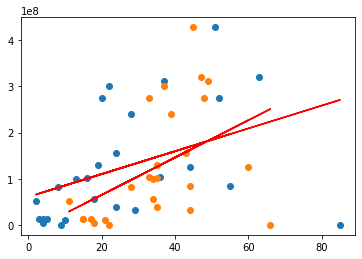

In [ ]:
# Showing the scatter plots of the linear regression models
plt.scatter(x_train_rt, y_train_rt)
plt.plot(x_train_rt, int_rt + coef_rt * x_train_rt, 'r')
plt.scatter(x_train_m, y_train_m)
plt.plot(x_train_m, int_m + coef_m * x_train_m, 'r')
plt.show()

#### Prediction Based on the Model

In [ ]:
# Testing Predictions
y_pred_reg_rt = reg_rt.predict(x_test_rt)
x_pred_reg_rt = reg_rt.predict(x_train_rt)

y_pred_reg_m = reg_m.predict(x_test_m)
x_pred_reg_m = reg_m.predict(x_train_m)


In [ ]:
# Showing actual values vs predicted values of the data
prediction = pd.DataFrame({'Actual Value': y_test_rt, 'Prediction1': y_pred_reg_rt, 'Prediction2': y_pred_reg_m})
prediction

,Actual Value,Prediction1,Prediction2
15,7516532.0,1.424006e+08,1.380138e+08
30,439048914.0,1.300486e+08,1.137736e+08
24,336365676.0,1.522822e+08,1.864940e+08
31,240558621.0,1.053447e+08,1.299337e+08
38,42145959.0,1.745158e+08,1.743739e+08
14,97607453.0,1.399302e+08,1.097336e+08
21,85416905.0,1.004039e+08,1.097336e+08
27,52302796.0,8.558149e+07,4.913335e+07
28,203277636.0,1.176967e+08,1.420538e+08
16,148412065.0,1.226375e+08,1.501338e+08


#### Accuracy of the Models

To test the accuracy, I will show the R squared values and error

In [ ]:
# R squared value
r2_rt = reg_rt.score(x_rt,y)*100
r2_m = reg_m.score(x_m,y)*100

print('R squared value for the Rotten Tomatoes model: ', r2_rt)
print('R squared value for the Metacritic model: ', r2_m)

R squared value for the Rotten Tomatoes model:  17.882129476729137
R squared value for the Metacritic model:  19.993340114549763


In [ ]:
mean_ab_er_rt = metrics.mean_absolute_error(y_test_rt, y_pred_reg_rt)
mean_sq_er_rt = metrics.mean_squared_error(y_test_rt, y_pred_reg_rt)
root_mean_er_rt = mean_sq_er_rt ** (1/2)

mean_ab_er_m = metrics.mean_absolute_error(y_test_m, y_pred_reg_m)
mean_sq_er_m = metrics.mean_squared_error(y_test_m, y_pred_reg_m)
root_mean_er_m = mean_sq_er_m ** (1/2)

print('Mean absolute error for the Rotten Tomatoes model: ', mean_ab_er_rt)
print('Mean square error for the Rotten Tomatoes model: ', mean_sq_er_rt)
print('Root mean square error for the Rotten Tomatoes model: ', root_mean_er_rt)

print('Mean absolute error for the Metacritic model: ', mean_ab_er_m)
print('Mean square error for the Metacritic model: ', mean_sq_er_m)
print('Root mean square error for the Metacritic model: ', root_mean_er_m)

Mean absolute error for the Rotten Tomatoes model:  112878463.25561361
Mean square error for the Rotten Tomatoes model:  1.9912528634891156e+16
Root mean square error for the Rotten Tomatoes model:  141111759.37848395
Mean absolute error for the Metacritic model:  99654727.96104068
Mean square error for the Metacritic model:  1.9547045344775624e+16
Root mean square error for the Metacritic model:  139810748.31634235


#### Linear Regression Conclusion

These data do not fit the Linear regrssion model generated here. As indicated by the R squared values, the Rotten Tomatoes and Metacritic models fit 18% and 20% of the data respectively. Additionally, the error is astronomically high. Overall, Rotten Tomatoes score and Metacritic scores individually seem to be not very good predictors of Worldwide box office sales on a linear regression model.

### Multiple Linear Regression


#### Creating the Multiple Linear Regression Model

In [ ]:
x = dataset[['Rotten Tomatoes', 'Metacritic']]
y = dataset['Worldwide box office']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 99)

In [ ]:
mreg = LinearRegression()
mreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
coef_rt = mreg.coef_[0]
coef_m = mreg.coef_[1]
intercept = mreg.intercept_

eq = 'Worldwide box office = %s + %s * (Rotten Tomatoes) + %s * (Metacritic)'%(intercept,coef_rt,coef_m)
eq

'Worldwide box office = -1986396.3426235616 + 645987.5078031039 * (Rotten Tomatoes) + 3168375.404288876 * (Metacritic)'

#### Prediction Based on the Model

In [ ]:
y_pred_mreg = mreg.predict(x_test)
x_pred_mreg = mreg.predict(x_train)

In [ ]:
prediction = pd.DataFrame({'Actual Value': y_test, 'Prediction': y_pred_mreg})
prediction

,Actual Value,Prediction
15,7516532.0,1.397295e+08
30,439048914.0,1.174893e+08
24,336365676.0,1.803339e+08
31,240558621.0,1.237029e+08
38,42145959.0,1.766427e+08
14,97607453.0,1.169048e+08
21,85416905.0,1.065690e+08
27,52302796.0,5.516749e+07
28,203277636.0,1.364380e+08
16,148412065.0,1.440667e+08


#### Accuracy of the Model

To test the accuracy, I will show the R squared values and error.

In [ ]:
# R squared value
r2 = mreg.score(x,y)*100

print('R squared value for the Multiple Linear Regression model: ', r2_rt)

R squared value for the Multiple Linear Regression model:  17.882129476729137


In [ ]:
mean_ab_er = metrics.mean_absolute_error(y_test, y_pred_mreg)
mean_sq_er = metrics.mean_squared_error(y_test, y_pred_mreg)
root_mean_er = mean_sq_er ** (1/2)

print('Mean absolute error for the Rotten Tomatoes model: ', mean_ab_er)
print('Mean square error for the Rotten Tomatoes model: ', mean_sq_er)
print('Root mean square error for the Rotten Tomatoes model: ', root_mean_er)

Mean absolute error for the Rotten Tomatoes model:  101294075.84043245
Mean square error for the Rotten Tomatoes model:  1.9363130961420748e+16
Root mean square error for the Rotten Tomatoes model:  139151467.69409493


#### Multiple Linear Regression Conclusion

These data do not seem to fit the multiple linear regrssion model generated either. As indicated by the R squared value, the multiple regression model fits 18% of the data. Additionally, the error is astronomically high, just like the Linear regression model. Overall, Rotten Tomatoes score and Metacritic scores together seem to be not very good predictors of Worldwide box office sales on a multiple linear regression model.

## Summary and Conclusion

Overall, it seems that Rotten Tomatoes and Metacritic scores are not valid predictors of Worldwide box office sales for Video Game Movies. This can be seen through their weak correlation in the scatter plots and heatmap, as well as the low R squared values and high error in both the linear regression model and multiple linear regression model.

Finally, the "so-bad-it's-good" effect seems to neither be proven nor disproven by this data.